# IFML, exc01
Johannes Kammerer, Zhao Sun, Tong Yu

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random

## 1 Monte-Carlo Simulation

### 1.1 Data Creation and Visualization

### Formula Derivation

#### CASE $p(X=x | Y=0) = 2-2x$
If $Y=0$,  CDF(x) $ = u = \int_{0}^{x} (2-2x)\,dx = 2x-x^2 $, then inverse CDF(x), $ x = 1- \sqrt{1-u}$
(take minus sign because $x \epsilon [0,1]$)


#### CASE $p(X=x | Y=0) = 2x$
If $Y=1$,  CDF(x) $ = u = \int_{0}^{x} (2x)\,dx = x^2 $, then inverse CDF(x), $ x = \sqrt{u}$


<span style = "color:green; font-weight:bold"/> 
Likelihoods, CDFs and inverse transform sampling equal to sample solution.

In [2]:
def create_data(N):
    X, Y = np.zeros(N), np.zeros(N)
    for i in range(N):
        Y[i] = random.randint(2) # prior probabilities
        u = random.rand() # uniformly distributed
        if Y[i] == 0:
            X[i] = 1-(1-u)**0.5 # Inverse transform sampling of likelihood
        elif Y[i] == 1:
            X[i] = u**0.5 # Inverse transform sampling of likelihood
    return X, Y

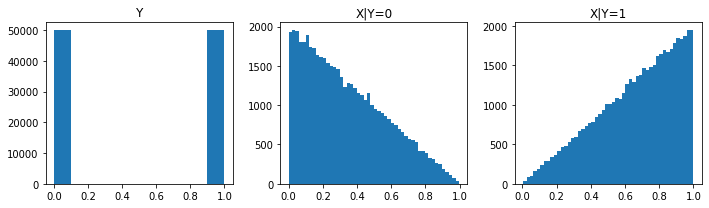

In [3]:
random.seed(1234)
X, Y = create_data(100000)
X0 = X[np.where(Y == 0)]
X1 = X[np.where(Y == 1)]

fig, ax = plt.subplots(1, 3, figsize = (10, 3), tight_layout = True)
ax[0].hist(Y)
ax[0].set_title('Y')
ax[1].hist(X0, bins = 50)
ax[1].set_title('X|Y=0')
ax[2].hist(X1, bins = 50)
ax[2].set_title('X|Y=1')
plt.show()

<span style = "color:green; font-weight:bold"/> 
Code is essentially equal to sample solution.

The numerical results follow the distributions of the likelihoods.

### 1.2 Classification by Threshold

In [4]:
def pNum(M, T, xt, cls):
    random.seed(1234)
    err = np.zeros(T)
    for i in range(T):
        X, Y = create_data(M)
        if cls == 'A':
            Yhat = 1*(X >= xt) # returns vector of Yhat
        elif cls == 'B':
            Yhat = 1*(X < xt)
        else: 
            return 0
        Ycor = 1*(Yhat == Y) # correct guesses
        err[i] = 1 - sum(Ycor)/len(Ycor) # error rate
    return err

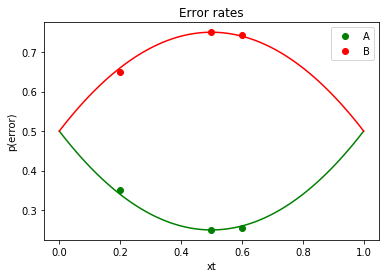

In [5]:
xtvalues = np.array([0.2, 0.5, 0.6])
pAnum = np.zeros(3)
pBnum = np.zeros(3)
for i in range(3):
    pAnum[i] = pNum(M = 10000, T = 1, xt = xtvalues[i], cls = 'A')
    pBnum[i] = pNum(M = 10000, T = 1, xt = xtvalues[i], cls = 'B')
    
xvalues = np.linspace(0, 1, 100)
def pAtheo(xt):
    return 1/4 + (xt-1/2)**2
def pBtheo(xt):
    return 3/4 - (xt-1/2)**2

plt.plot(xtvalues, pAnum, 'go', label = 'A')
plt.plot(xtvalues, pBnum, 'ro', label = 'B')
plt.plot(xvalues, pAtheo(xvalues), c = 'g')
plt.plot(xvalues, pBtheo(xvalues), c = 'r')
plt.xlabel('xt')
plt.ylabel('p(error)')
plt.title('Error rates')
plt.legend()
plt.show()

In [6]:
for i in range(3):
    xt = xtvalues[i]
    print('xt =', xt, ', rule A: p_th=%.2f' %pAtheo(xt), 'p_num=%.3f' %pAnum[i])

xt = 0.2 , rule A: p_th=0.34 p_num=0.351
xt = 0.5 , rule A: p_th=0.25 p_num=0.250
xt = 0.6 , rule A: p_th=0.26 p_num=0.256


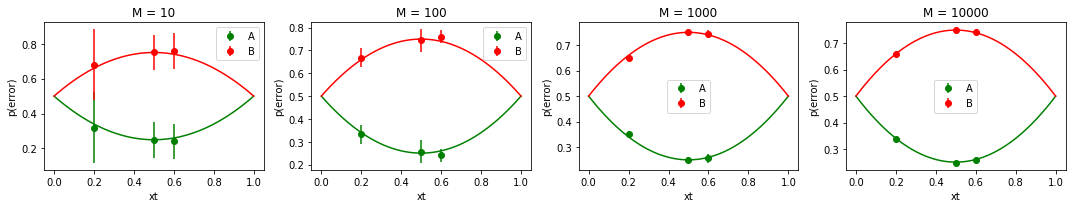

In [7]:
x = xtvalues
Mvalues = np.array([10, 100, 1000, 10000])
MpA, MpB, MstdA, MstdB = np.zeros(4), np.zeros(4), np.zeros(4), np.zeros(4)

fig, ax = plt.subplots(1, 4, figsize = (15, 3), tight_layout = True)

for m in range(4):
    x = xtvalues
    yA = [np.mean(pNum(M = Mvalues[m], T = 10, xt = i, cls = 'A')) for i in x]
    yerrA = [np.std(pNum(M = Mvalues[m], T = 10, xt = i, cls = 'A')) for i in x]
    MpA[m] = yA[1]
    MstdA[m] = yerrA[1]
    ax[m].errorbar(x, yA, yerr = yerrA, fmt = 'go', label = 'A')
    ax[m].plot(xvalues, pAtheo(xvalues), c = 'g')
    yB = [np.mean(pNum(M = Mvalues[m], T = 10, xt = i, cls = 'B')) for i in x]
    yerrB = [np.std(pNum(M = Mvalues[m], T = 10, xt = i, cls = 'B')) for i in x]
    MpB[m] = yB[1]
    MstdB[m] = yerrB[1]
    ax[m].errorbar(x, yB, yerr = yerrB, fmt = 'ro', label = 'B')
    ax[m].plot(xvalues, pBtheo(xvalues), c = 'r')
    ax[m].set_title('M = %i' %Mvalues[m])
    ax[m].set_xlabel('xt')
    ax[m].set_ylabel('p(error)')
    ax[m].legend()
plt.show()

#### OBSERVATIONS
1. The chart above confirms that the minimum overall error of 25% is achieved when the threshold $x_t = 0.5$ for rule A (green line and dots);
2. The error standard deviation decrease with increasing M.

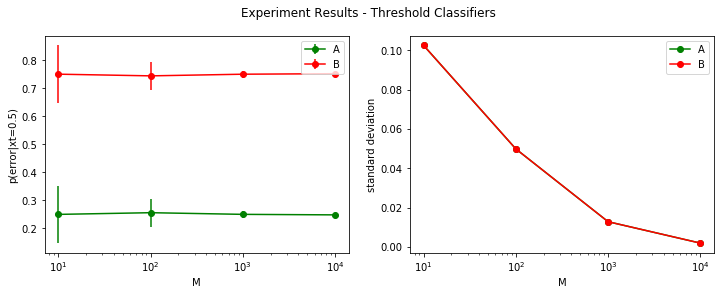

In [8]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle("Experiment Results - Threshold Classifiers")

ax1.errorbar(Mvalues, MpA, yerr = MstdA, fmt = 'go-', label = 'A')
ax1.errorbar(Mvalues, MpB, yerr = MstdB, fmt = 'ro-', label = 'B')
ax1.set_xscale('log')
ax1.set_title('')
ax1.set_xlabel('M')
ax1.set_ylabel('p(error|xt=0.5)')
ax1.legend()

ax2.plot(Mvalues, MstdA, 'go-', label = 'A')
ax2.plot(Mvalues, MstdB, 'ro-', label = 'B')
ax2.set_xscale('log')
ax2.set_title('')
ax2.set_xlabel('M')
ax2.set_ylabel('standard deviation')
ax2.legend()

plt.show()

<span style = "color:green; font-weight:bold"/> 
Code is essentially equal to sample solution. The latter is more elegant in its classification by M, A/B and xt in the form of a pd dataframe.

### 1.3 Baseline Classifiers

In [9]:
def pnumC(M, T):
    random.seed(1234)
    err = np.zeros(T)
    for i in range(T):
        X, Y = create_data(M)
        Yhat = [random.randint(2) for i in range(M)] # Yhat in {0,1}
        Ycor = 1*(Yhat == Y) # correct guesses
        err[i] = 1 - sum(Ycor)/len(Ycor) # error rate
    return err

def pnumD(M, T):
    random.seed(1234)
    err = np.zeros(T)
    for i in range(T):
        X, Y = create_data(M)
        Yhat = np.ones(M)
        Ycor = 1*(Yhat == Y) # correct guesses
        err[i] = 1 - sum(Ycor)/len(Ycor) # error rate
    return err

In [10]:
x = xtvalues
Mvalues = np.array([10, 100, 1000, 10000])
pC, stdC, pD, stdD = np.zeros(4), np.zeros(4), np.zeros(4), np.zeros(4)

for m in range(4):
    pC[m] = np.mean(pnumC(M = Mvalues[m], T = 10))
    stdC[m] = np.std(pnumC(M = Mvalues[m], T = 10))
    pD[m] = np.mean(pnumD(M = Mvalues[m], T = 10))
    stdD[m] = np.std(pnumD(M = Mvalues[m], T = 10))

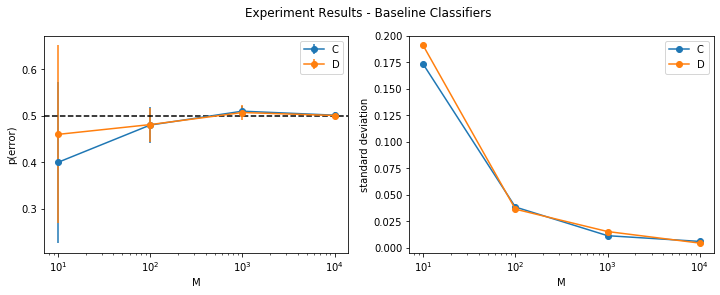

In [11]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle("Experiment Results - Baseline Classifiers")

ax1.errorbar(Mvalues, pC, yerr = stdC, fmt = 'o-', label = 'C')
ax1.errorbar(Mvalues, pD, yerr = stdD, fmt = 'o-', label = 'D')
ax1.axhline(y = 0.5, c = 'k', ls = '--')
ax1.set_xscale('log')
ax1.set_title('')
ax1.set_xlabel('M')
ax1.set_ylabel('p(error)')
ax1.legend()

ax2.plot(Mvalues, stdC, 'o-', label = 'C')
ax2.plot(Mvalues, stdD, 'o-', label = 'D')
ax2.set_xscale('log')
ax2.set_title('')
ax2.set_xlabel('M')
ax2.set_ylabel('standard deviation')
ax2.legend()

plt.show()

error rate is around 1/2 and the standard deviation decreases with increasing size of the test set.

<span style = "color:green; font-weight:bold"/> 
Code is correct. This code is more elegant in the calculation of the error rate (comparing two vectors instead of element-wise correction). The sample code is more elegant in defining the function evaluate_classifier().

### 1.4 Nearest Neighbor Classification

In [12]:
random.seed(1234)

def create_data_2():
    u = np.random.random(2)
    Y = np.array([0,1])
    X = np.array([1 - np.sqrt(1-u[0]), np.sqrt(u[1])])
    
    return X,Y


def nearest_neightbour_classifier(training_data, test_data):
    M = len(test_data[0])
    predict = np.zeros(M)
    
    for i in range(M):
        dist = abs(training_data[0] - test_data[0][i])
        idx = dist.argmin()
        predict[i] = training_data[1][idx]
    
    return predict


In [13]:
# Determine the error rate of the nearest neighbour classifier on a sufficiently large test set

N_test = 10000
test_data = create_data(N_test)
training_data = create_data_2()
prediction = nearest_neightbour_classifier(training_data, test_data)
error_rate = (prediction != test_data[1]).sum() / N_test


# Repeat this with 100 different training sets (all of size N = 2) and compute the average error on the same test set

errors = np.zeros(100)
for i in range(100):
    training_data = create_data_2()
    prediction = nearest_neightbour_classifier(training_data, test_data)
    errors[i] = (prediction != test_data[1]).sum() / N_test
err2 = errors.mean()
print("Average error rate with training sets of size N = 2: {:1.1%}".format(err2))

Average error rate with training sets of size N = 2: 36.6%


In [14]:
# Repeat the experiment with training sets of size N = 100 and report the average error

errors = np.zeros(100)
for i in range(100):
    training_data = create_data(100)
    prediction = nearest_neightbour_classifier(training_data, test_data)
    errors[i] = (prediction != test_data[1]).sum() / N_test
err100 = errors.mean()
print("Average error rate with training sets of size N = 100: {:1.1%}".format(err100))

Average error rate with training sets of size N = 100: 34.0%


Fits roughly to the theoretical expection for N=2: p(error)=35% as derived in the lecture.
In this case the larger test set size decreases the error rate only slightly.

<span style = "color:green; font-weight:bold"/> 
Code, result and conclusion are essentially identical to the sample solution.